## Install nibabel linrary if not installed.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
%cd /content/drive/MyDrive/Colab\ Notebooks/aml2024-students-copy/MiniAssignments/ma14_mutual_infomation

/content/drive/MyDrive/Colab Notebooks/aml2024-students-copy/MiniAssignments/ma14_mutual_infomation


In [4]:
! pip install nibabel

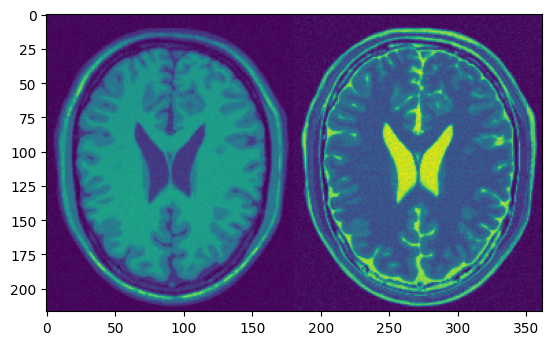

In [16]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# install your google drive

t1_img = nib.load('t1_icbm_normal_1mm_pn3_rf20.mnc')
t2_img = nib.load('t2_icbm_normal_1mm_pn3_rf20.mnc')

t1_data = t1_img.get_fdata()
t2_data = t2_img.get_fdata()

t1_data = t1_data/np.max(t1_data)
t2_data = t2_data/np.max(t2_data)

t1_slice = np.squeeze(t1_data[94, :,:])
t2_slice = np.squeeze(t2_data[94, :,:])
plt.imshow(np.hstack((t1_slice, t2_slice)))

In [17]:
def givelog(hist):
  loghist = np.zeros(hist.shape)
  non_zeros = hist != 0
  loghist[non_zeros] = np.log(hist[non_zeros])
  return loghist

# Joint histogram and marginals
The one-dimensional histograms of the example slices. Note that these are very different


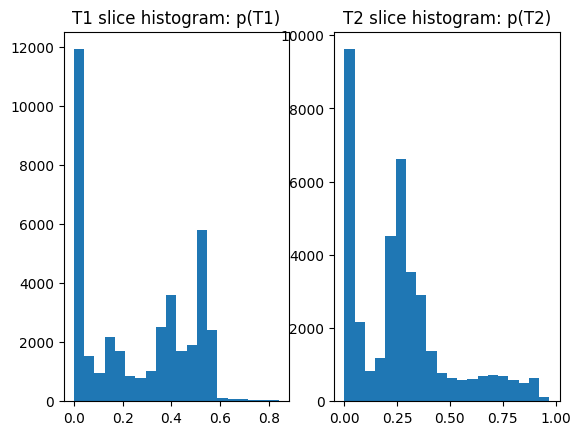

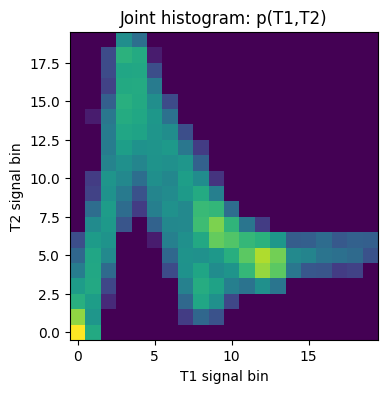

In [18]:
fig, axes = plt.subplots(1, 2)
axes[0].hist(t1_slice.ravel(), bins=20)
axes[0].set_title('T1 slice histogram: p(T1)')
axes[1].hist(t2_slice.ravel(), bins=20)
axes[1].set_title('T2 slice histogram: p(T2)')


Joint_histogram, x_edges, y_edges = np.histogram2d(t1_slice.ravel(),t2_slice.ravel(),bins=20)
fig, ax = plt.subplots(figsize=(4,4))
s=ax.imshow(givelog(Joint_histogram).T, origin='lower')
s=ax.set_xlabel('T1 signal bin')
s=ax.set_ylabel('T2 signal bin')
s=ax.set_title('Joint histogram: p(T1,T2)')

### Mutual information = KL divergence between p(x,y) and p(x)p(y)

Note that $$p(x) = \sum_y p(x,y)$$ $$p(y) = \sum_x p(x,y)$$


$$MI =\sum_{x,y} p(x,y) \log\left(\frac{p(x,y)}{p(x)p(y)}\right)$$

Interpretation: Information provided by $x$ about $y$ or vice-versa

<font color=red> ADD YOUR CODE BELOW</font>

---

In [60]:
def mi(joint_histogram):
  pxy = joint_histogram/np.sum(joint_histogram)
  px = np.sum(pxy, axis=1)
  py = np.sum(pxy, axis=0)
  px_py = np.outer(px, py) # px@py
  nzs = pxy > 0 # Only non-zero pxy values contribute to the sum

  MI = np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs])) # sum only over non-zero entries.
  return MI, px_py


Compute the joint histogram and evaluate the mutual information. Note that the histogram is highly structure and sparse, indicating that a specific T1 value matches with a specific T2 value.

Note that the mapping is not invertible, indicating that one may get T1 from T1, but not the other way around.


Mutual Information =  1.1311124525294005


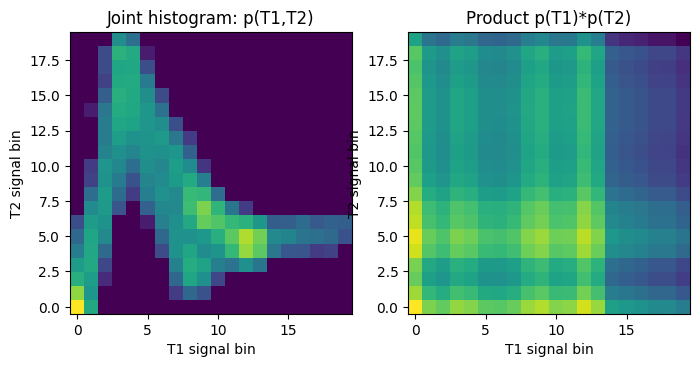

In [61]:
Joint_histogram, x_edges, y_edges = np.histogram2d(t1_slice.ravel(),t2_slice.ravel(),bins=20)
MI, pt1_pt2 = mi(Joint_histogram)
print('Mutual Information = ',MI)

fig, ax = plt.subplots(1,2,figsize=(8,8))
s=ax[0].imshow(givelog(Joint_histogram).T, origin='lower')
s=ax[0].set_xlabel('T1 signal bin')
s=ax[0].set_ylabel('T2 signal bin')
s=ax[0].set_title('Joint histogram: p(T1,T2)')

s=ax[1].imshow(givelog(pt1_pt2).T, origin='lower')
s=ax[1].set_xlabel('T1 signal bin')
s=ax[1].set_ylabel('T2 signal bin')
s=ax[1].set_title('Product p(T1)*p(T2)')


Move the T2 slice and compute the new histogram and evaluate MI

Note that the histogram is more diffuse compared to the unshifted one, indicating low MI. This implies that a specific T1 value does not always correspond a specific T2 value


Mutual Information =  0.13903779669682542


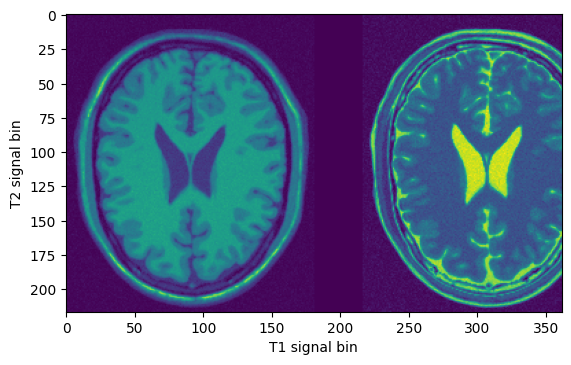

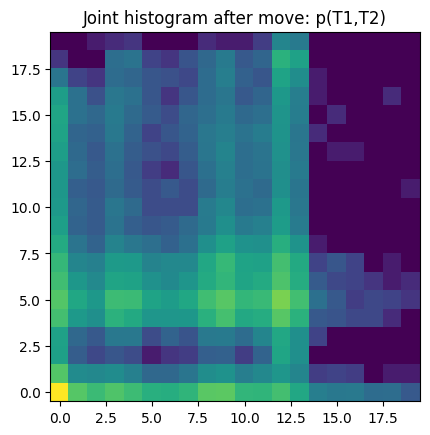

In [59]:
t2_slice_moved = np.zeros(t2_slice.shape)
t2_slice_moved[:,35:] = t2_slice[:,:-35]
s= plt.imshow(np.hstack((t1_slice, t2_slice_moved)))
Joint_histogram_moved, x_edges, y_edges = np.histogram2d(t1_slice.ravel(),t2_slice_moved.ravel(),bins=20)
s=plt.xlabel('T1 signal bin')
s=plt.ylabel('T2 signal bin')

MI_moved,pxy = mi(Joint_histogram_moved)
print('Mutual Information = ',MI_moved)
plt.figure()
s=plt.imshow(givelog(Joint_histogram_moved).T, origin='lower')
s=plt.title('Joint histogram after move: p(T1,T2)')
